In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import scipy.interpolate as sci
from scipy import signal
from datetime import datetime, timedelta

In [13]:
import statistics

In [2]:
%matplotlib nbagg

In [3]:
epoch = datetime(1, 1, 1)

## Hour Resolution Data

In [4]:
all_hour = np.loadtxt("Data/AllStations_temperature_hour_data_2019.dat")

In [5]:
longitudes = all_hour[0][1:]
latitudes = all_hour[1][1:]

coordinates = []

for i in range(len(longitudes)):
    a = "(" + str(round(latitudes[i],3)) + "\u00B0N, " + str(round(longitudes[i], 3)) + "\u00B0E)"
    coordinates.append(a)

In [6]:
all_hour_reshaped = np.transpose(all_hour[3:])

In [7]:
hour_times = all_hour_reshaped[0]
all_hour_stations = all_hour_reshaped[1:]

In [8]:
us_hr_dict = {"Times": hour_times, "ush": all_hour_stations[-3]}
us_hr_df = pd.DataFrame(us_hr_dict)
us_hr_df_snipped = us_hr_df.dropna()
us_hr_mean = us_hr_df_snipped["ush"].mean()
us_hr_var = us_hr_df_snipped["ush"].var()

In [9]:
uvic_sci_hr_fn = sci.interp1d(us_hr_df_snipped["Times"], us_hr_df_snipped["ush"])

The below code is for the big color plot. Please skip it when repeatedly running code.

In [15]:
hour_time_pretty = [epoch + timedelta(days=y-367.0) for y in hour_times]

In [9]:
hourdatelist = []
hourxlocdate = []
for i in range(1, 6):
    hourdatelist.append(str(hour_time_pretty[int(i*len(hour_times)/6)].year))
    hourxlocdate.append(i*1.3*len(coordinates)/6)

<IPython.core.display.Javascript object>


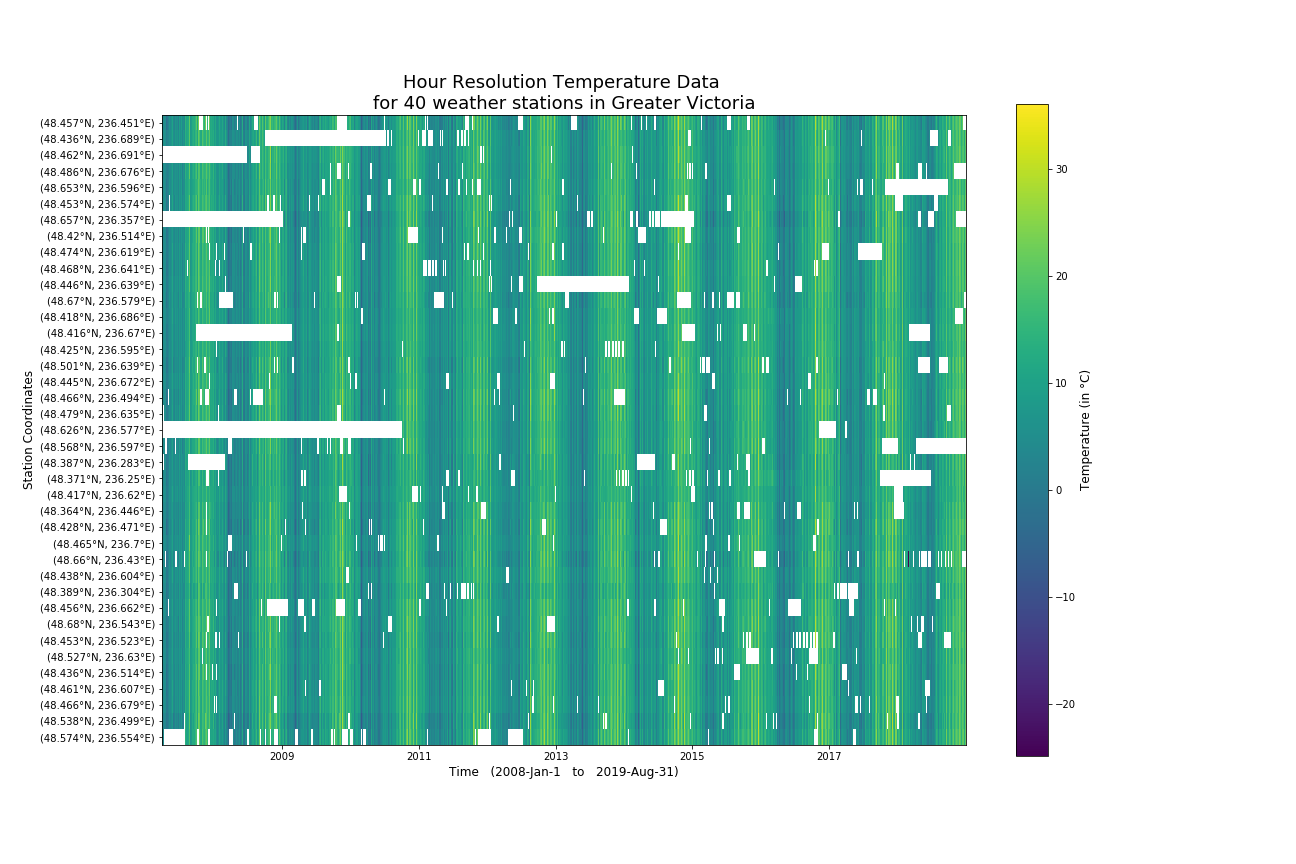

In [10]:
plt.close()

#Sets font size for all plots until specified otherwise
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)

plt.figure(figsize=(18, 12))
plt.imshow(all_hour_stations, extent=(1, 1.3*len(coordinates), 0, len(coordinates)), interpolation='nearest', origin='lower', cmap='viridis')
plt.xlabel('Time   (2008-Jan-1   to   2019-Aug-31)')
plt.xticks(ticks=hourxlocdate, labels=hourdatelist)
plt.yticks(np.array(range(1, len(coordinates) + 1)) - 0.5, coordinates)
plt.ylabel('Station Coordinates')
plt.title("Hour Resolution Temperature Data \nfor 40 weather stations in Greater Victoria")
cb = plt.colorbar()
cb.set_label("Temperature (in \u00B0C)")

In [11]:
#plt.savefig("/home/jupyter/Phys-411-final-project/Images/RawHourData.eps")
plt.close()

Run code from here.

In [8]:
coastline_coordinates = np.loadtxt("Data/Coastline.dat")

In [9]:
coastline_coordinates = np.transpose(coastline_coordinates)

In [10]:
station_loc_x = 110*np.cos(np.pi*latitudes/180)*(longitudes - 360)
station_loc_y = 110*latitudes

In [11]:
coast_loc_x = 110*np.cos(np.pi*coastline_coordinates[1]/180)*coastline_coordinates[0]
coast_loc_y = 110*coastline_coordinates[1]

In [12]:
scale_factor = np.cos(np.pi*latitudes[10]/180)

<IPython.core.display.Javascript object>


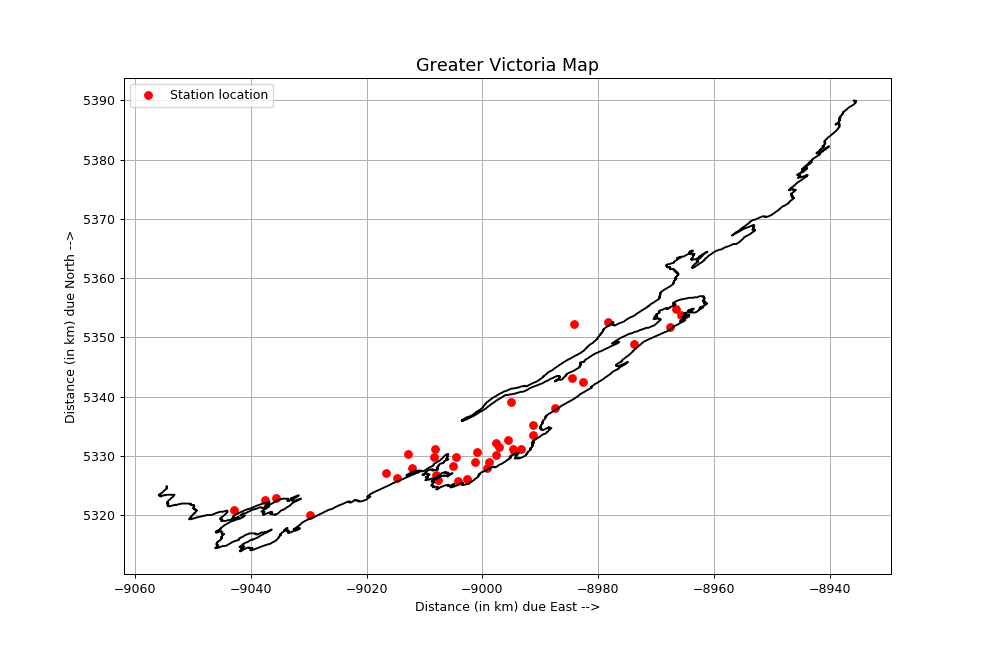

In [15]:
plt.close()

plt.rc('axes', titlesize=14)

plt.figure(figsize=(11, 11*scale_factor))
plt.plot(station_loc_x, station_loc_y, 'ro', label="Station location")
plt.plot(coast_loc_x, coast_loc_y, 'k-')
plt.grid(True)
plt.xlabel("Distance (in km) due East -->")
plt.ylabel("Distance (in km) due North -->")
plt.title("Greater Victoria Map")
plt.legend()

In [16]:
#plt.savefig("/home/jupyter/Phys-411-final-project/Images/GreaterVictoriaMap.eps")
plt.close()

In [27]:
x_gridline = np.linspace(min(station_loc_x)-1, max(station_loc_x)+1, 50)
y_gridline = np.linspace(min(station_loc_y)-1, max(station_loc_y)+1, int(50*scale_factor))

x_grid, y_grid = np.meshgrid(x_gridline, y_gridline)

In [16]:
station_loc_pts = np.array([station_loc_x, station_loc_y]).transpose()

In [17]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [18]:
vor = Voronoi(station_loc_pts)

In [19]:
from scipy.spatial import Delaunay

In [20]:
tri = Delaunay(station_loc_pts)

<IPython.core.display.Javascript object>


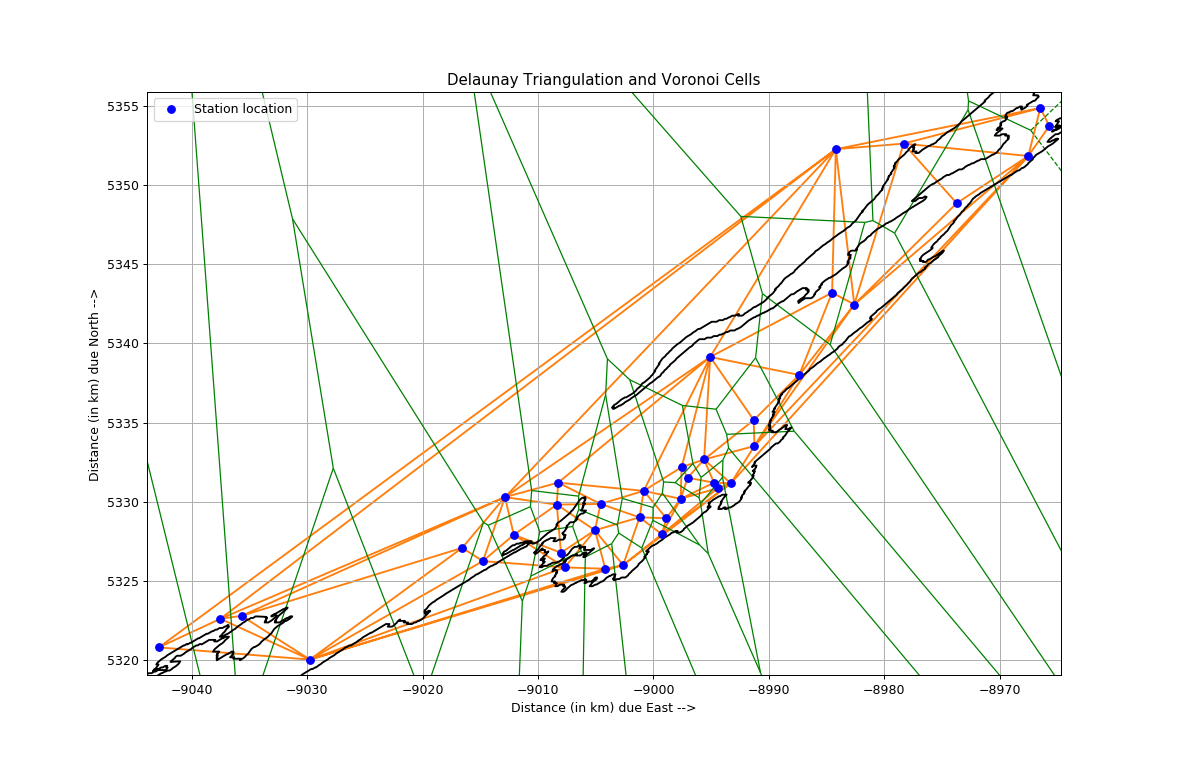

In [127]:
plt.close()
voronoi_plot_2d(vor, show_vertices=False, line_colors="green")
plt.plot(coast_loc_x, coast_loc_y, 'k-')
plt.triplot(station_loc_pts[:,0], station_loc_pts[:,1], tri.simplices.copy())
plt.plot(station_loc_x, station_loc_y, 'bo', label="Station location")
plt.xlim(min(x_gridline), max(x_gridline))
plt.ylim(min(y_gridline), max(y_gridline))
plt.xlabel("Distance (in km) due East -->")
plt.ylabel("Distance (in km) due North -->")
plt.title("Delaunay Triangulation and Voronoi Cells")
plt.grid(True)
plt.legend()
plt.show()

In [32]:
#plt.savefig("/home/jupyter/Phys-411-final-project/Images/Triangulation.eps")
plt.close()

Voronoi cells represent nearest neighbour approximation i.e. each cell takes the value of the point it encloses. Voronoi cells are based on Delaunay triangulation. The interpolation I used, applies Delaunay triangulation and constructs a piecewise cubic interpolating Bezier polynomial on each triangle, using a Clough-Tocher scheme. The interpolant is guaranteed to be continuously differentiable.

In [13]:
from scipy.interpolate import griddata

In [46]:
morning_values = []
night_values = []
for i in range(len(hour_times)):
    time = hour_time_pretty[i]
    temps = all_hour[i+2][1:]
    
    if time.year >= 2011 and time.month == 6 and time.day == 20:
        
        if time.hour == 12:
            morning_values.append(temps)
        if time.hour == 3:
            night_values.append(all_hour[i][1:])
    
    if time.year >= 2011 and time.month == 12 and time.day == 21:
        
        if time.hour == 12:
            morning_values.append(temps)
        if time.hour == 3:
            night_values.append(all_hour[i][1:])
    if time.year == 2019:
        break

In [17]:
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [47]:
len(night_values)

16

In [39]:
len(morning_values)

16

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

<IPython.core.display.Javascript object>


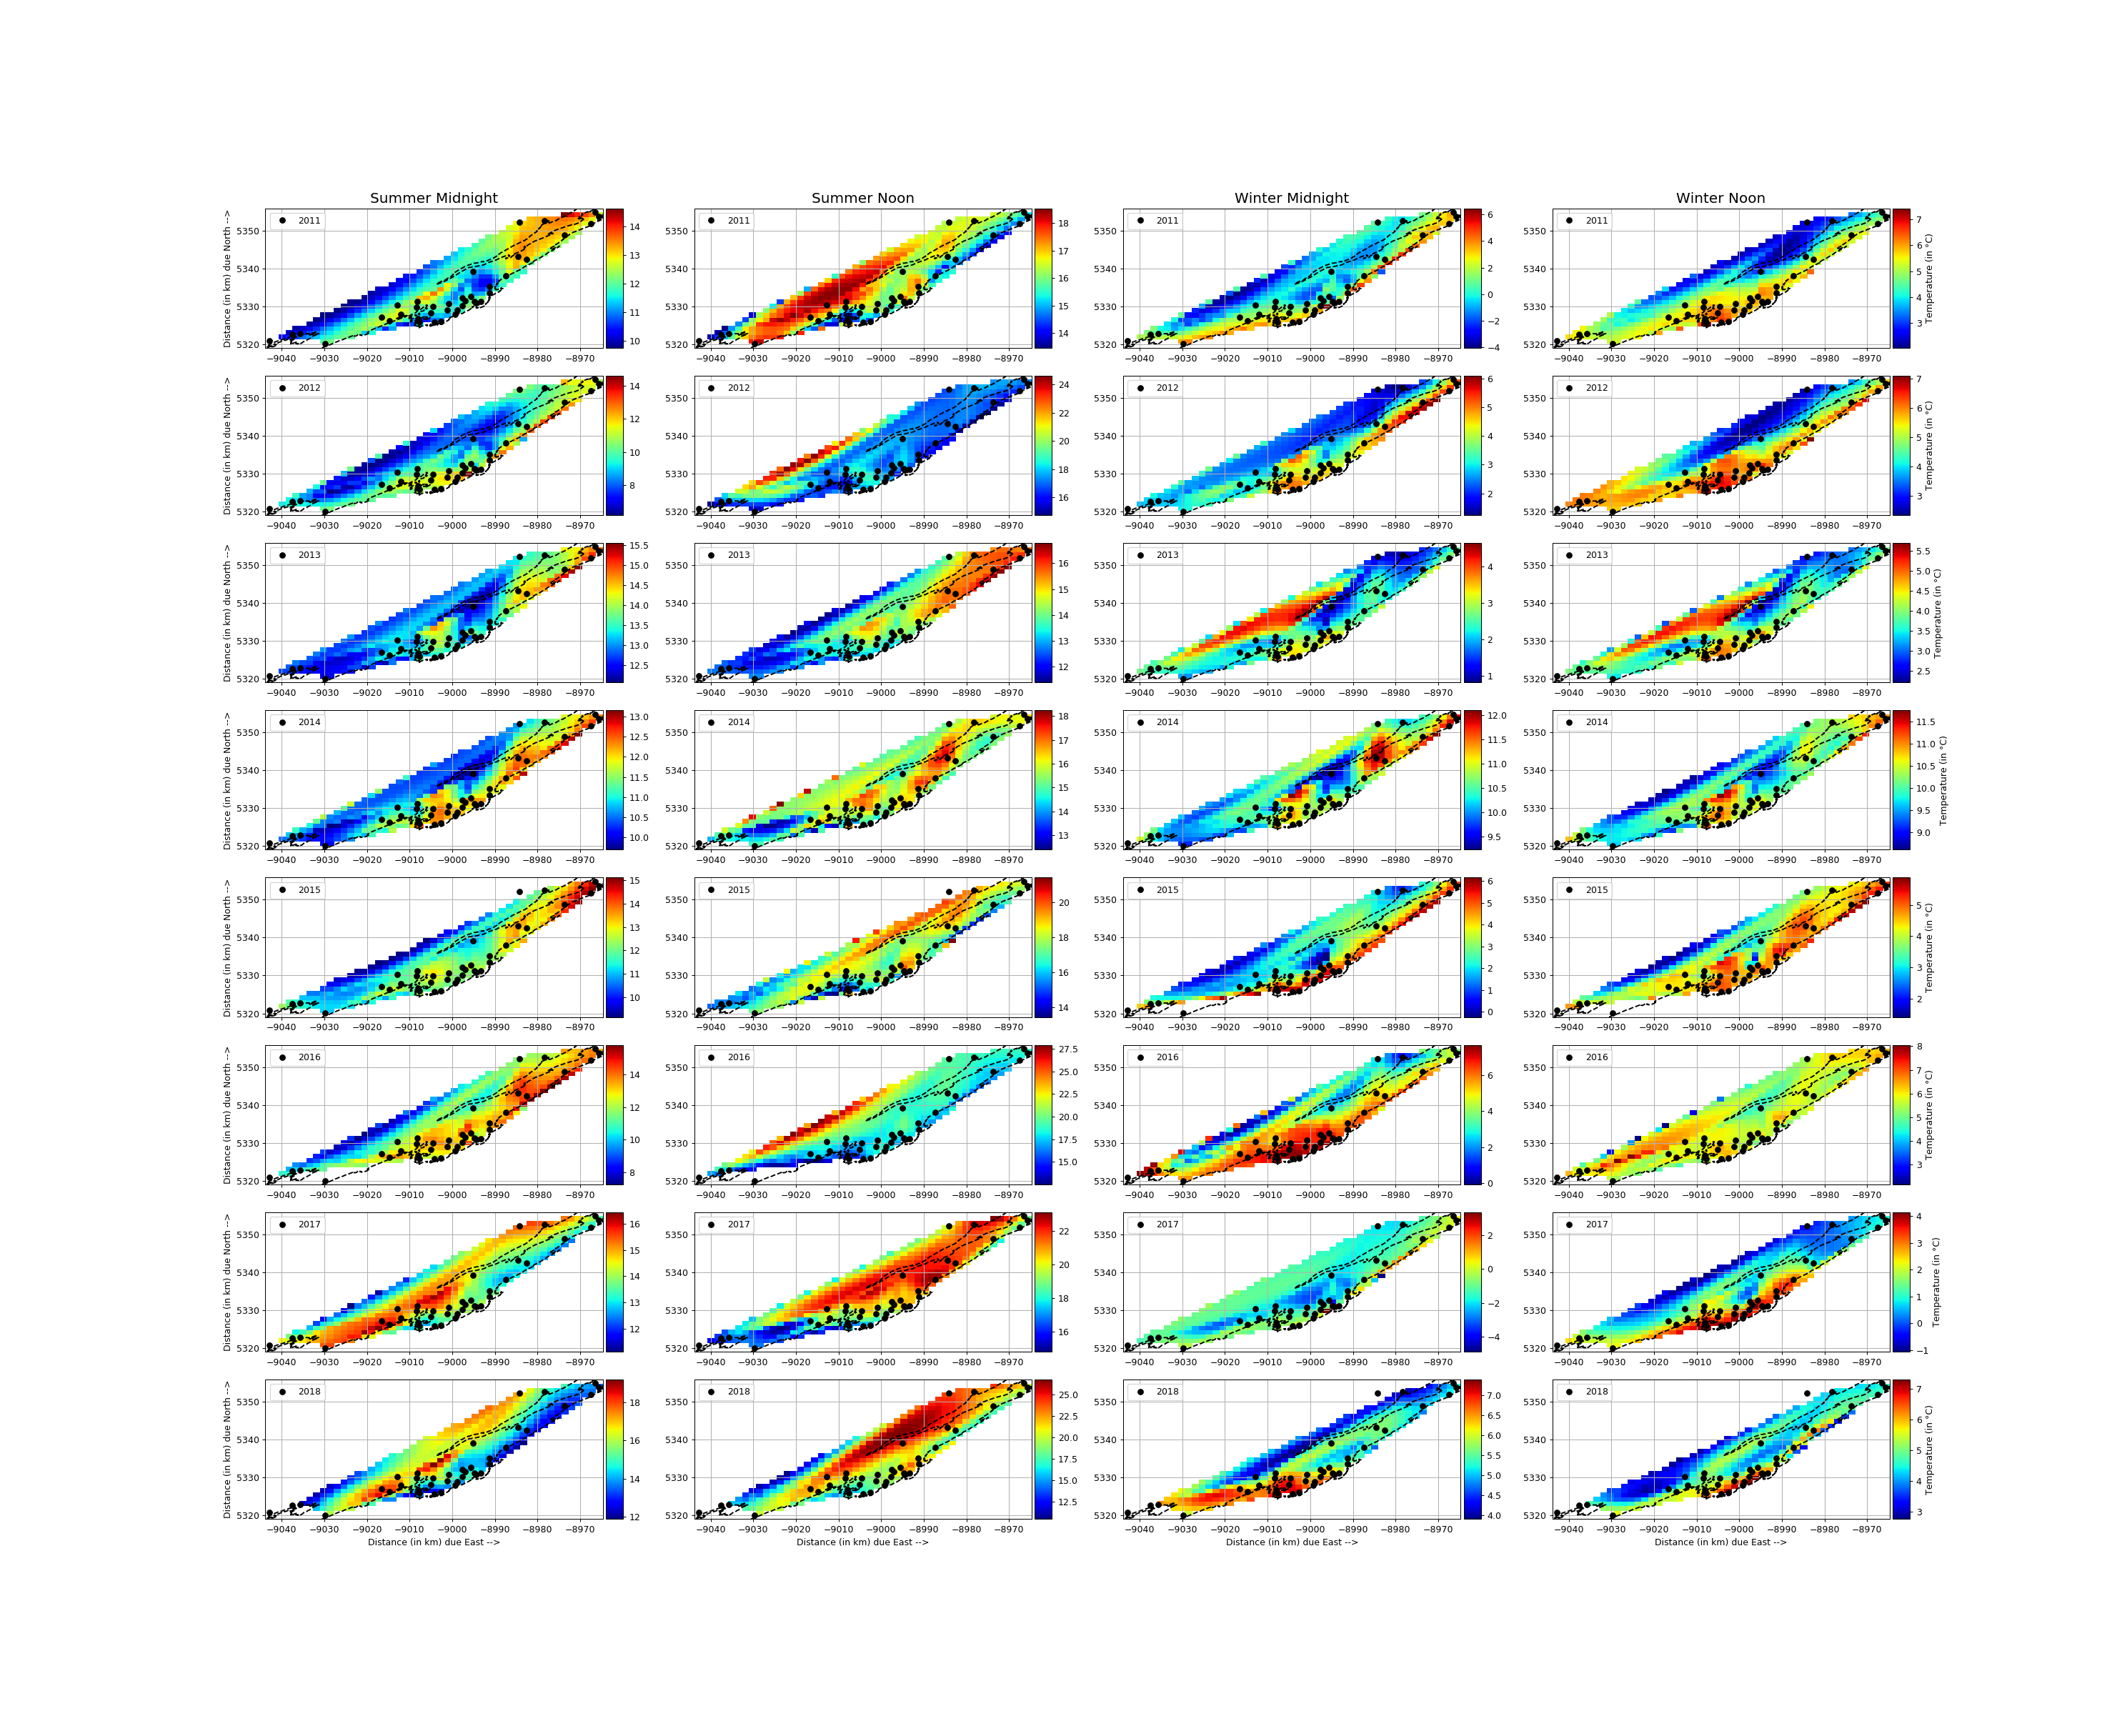

Text(0, 0.5, 'Distance (in km) due North -->')

In [48]:
plt.close()
plt.rc('axes', titlesize=16)
fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(33, 27))
ax = ax.flatten()
for i in range(len(ax.flat)):
    if i%2 == 0:
        test_dict = {"x": station_loc_x, "y": station_loc_y, "Values": night_values[i//2]}
    else:
        test_dict = {"x": station_loc_x, "y": station_loc_y, "Values": morning_values[i//2]}
    test_df = pd.DataFrame(test_dict)
    test_df = test_df.dropna()
    snipped_loc_pts = np.array([test_df["x"], test_df["y"]]).transpose()
    z = griddata(snipped_loc_pts, test_df["Values"], (x_grid, y_grid), method='cubic')
    im = ax[i].pcolor(x_grid, y_grid, z, cmap="jet")
    ax[i].plot(coast_loc_x, coast_loc_y, 'k--')
    ax[i].plot(station_loc_x, station_loc_y, 'ko', label=years[i//4])
    ax[i].set_xlim(min(x_gridline), max(x_gridline))
    ax[i].set_ylim(min(y_gridline), max(y_gridline))
    ax[i].grid(True)
    ax[i].legend()
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cb = fig.colorbar(im, cax=cax, orientation='vertical')
    if i%4 == 3:
        cb.set_label("Temperature (in \u00B0C)")

ax[0].set_title("Summer Midnight")
ax[1].set_title("Summer Noon")
ax[2].set_title("Winter Midnight")
ax[3].set_title("Winter Noon")
ax[28].set_xlabel("Distance (in km) due East -->")
ax[29].set_xlabel("Distance (in km) due East -->")
ax[30].set_xlabel("Distance (in km) due East -->")
ax[31].set_xlabel("Distance (in km) due East -->")
ax[0].set_ylabel("Distance (in km) due North -->")
ax[4].set_ylabel("Distance (in km) due North -->")
ax[8].set_ylabel("Distance (in km) due North -->")
ax[12].set_ylabel("Distance (in km) due North -->")
ax[16].set_ylabel("Distance (in km) due North -->")
ax[20].set_ylabel("Distance (in km) due North -->")
ax[24].set_ylabel("Distance (in km) due North -->")
ax[28].set_ylabel("Distance (in km) due North -->")
#cb = fig.colorbar(im, ax=ax.ravel().tolist())
#cb.set_label("Temperature (in \u00B0C)")
#plt.suptitle("Temperatures across Greater Victoria 2011-2017")

In [50]:
#plt.savefig("/home/jupyter/Phys-411-final-project/Images/SummerWinterThermalMaps.eps")
plt.close()

## Minute Resolution Data

In [4]:
uvic_sci = np.loadtxt("Data/AllStations_temperature_minute_data_2019/UVicSci_temperature_2019.dat")

In [5]:
min_times = np.linspace(uvic_sci[0], uvic_sci[1], uvic_sci[2])

In [6]:
uvic_sci_min = uvic_sci[3:]

In [7]:
james_bay = np.loadtxt("Data/AllStations_temperature_minute_data_2019/JamesBay_temperature_2019.dat")

In [8]:
james_bay_min = james_bay[3:]

In [9]:
deep_cove = np.loadtxt("Data/AllStations_temperature_minute_data_2019/DeepCove_temperature_2019.dat")

In [10]:
deep_cove_min = deep_cove[3:]

In [11]:
john_muir = np.loadtxt("Data/AllStations_temperature_minute_data_2019/JohnMuir_temperature_2019.dat")

In [12]:
john_muir_min = john_muir[3:]

In [13]:
keating = np.loadtxt("Data/AllStations_temperature_minute_data_2019/Keating_temperature_2019.dat")

In [14]:
keating_min = keating[3:]

In [15]:
helgesen = np.loadtxt("Data/AllStations_temperature_minute_data_2019/Helgesen_temperature_2019.dat")

In [16]:
helgesen_min = helgesen[3:]

In [17]:
discovery_elementary = np.loadtxt("Data/AllStations_temperature_minute_data_2019/DiscoveryElementary_temperature_2019.dat")

In [18]:
discovery_elementary_min = discovery_elementary[3:]

The below code is for the big color plot. Please skip it when repeatedly running code.

In [19]:
min_time_pretty = [epoch + timedelta(days=y-367.0) for y in min_times]

In [20]:
all_min_stations = np.ndarray((7, len(uvic_sci_min)))

In [21]:
all_min_stations[0] = uvic_sci_min #48.462N, 236.691E
all_min_stations[1] = james_bay_min #48.417N, 236.62E
all_min_stations[2] = john_muir_min #48.371N, 236.25E
all_min_stations[3] = deep_cove_min #48.68N, 236.543E
all_min_stations[4] = keating_min #48.568N, 236.597E
all_min_stations[5] = helgesen_min #48.364N, 236.446E
all_min_stations[6] = discovery_elementary_min #48.652N, 236.349E

In [22]:
mindatelist = []
minxlocdate = []
for i in range(1, 6):
    mindatelist.append(str(min_time_pretty[int(i*len(min_times)/6)].year))
    minxlocdate.append(i*1.3*40/6)

In [23]:
minnamelist = ["UVic Science Bldg.\n(48.462\u00B0N, 236.691\u00B0E)", "James Bay\n(48.417\u00B0N, 236.62\u00B0E)", "John Muir\n(48.371\u00B0N, 236.25\u00B0E)", "Deep Cove\n(48.68\u00B0N, 236.543\u00B0E)", "Keating\n(48.568\u00B0N, 236.597\u00B0E)", "Helgesen Elementary\n(48.364\u00B0N, 236.446\u00B0E)", "Discovery Elementary\n(48.652\u00B0N, 236.349\u00B0E)"]

In [24]:
minylocname = []
for i in range(1, 8):
    minylocname.append(i*0.5*40/7 - 0.5*40/18)

<IPython.core.display.Javascript object>


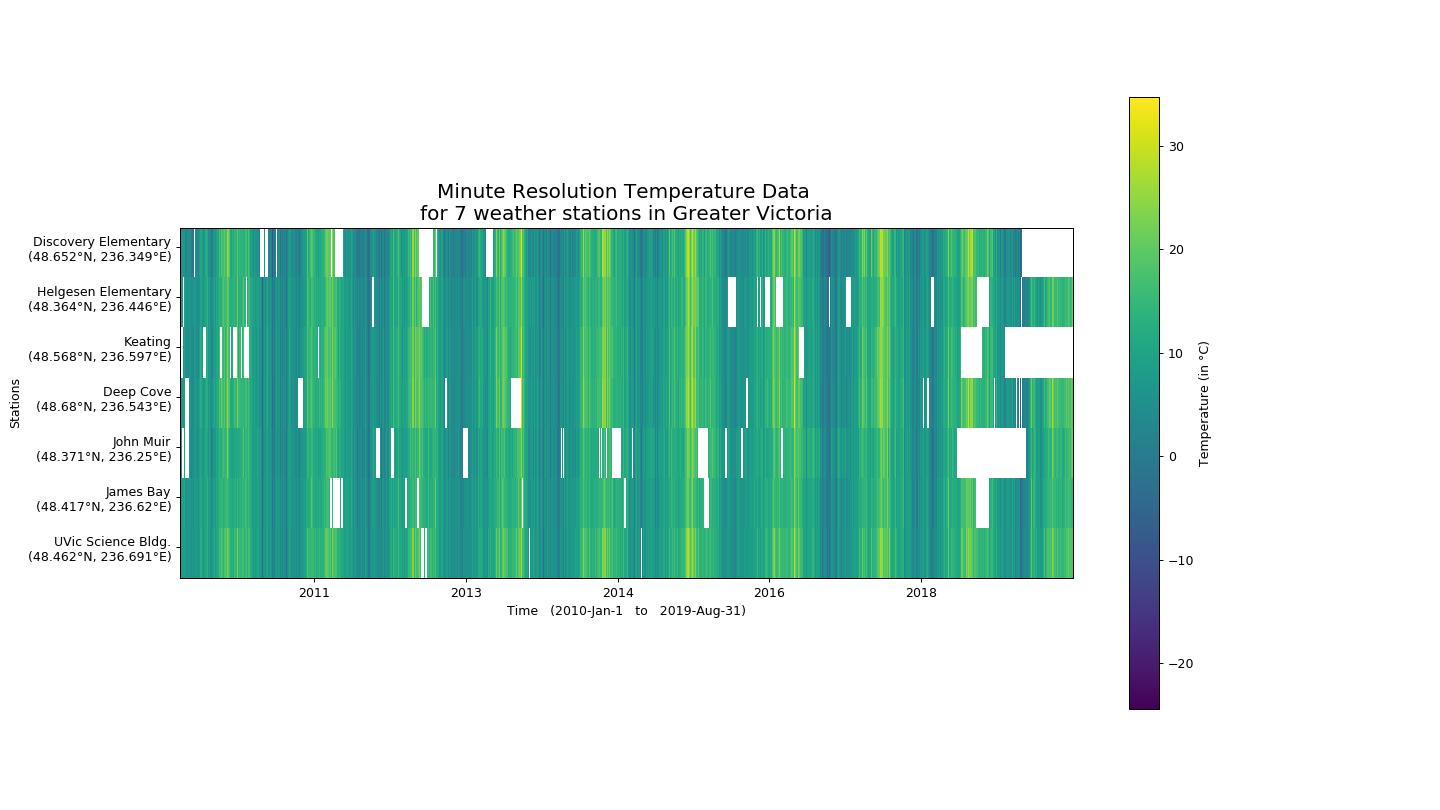

In [25]:
plt.close()
#Sets font size for all plots until specified otherwise
plt.rc('axes', labelsize=10)
plt.rc('axes', titlesize=16)

plt.figure(figsize=(16, 9))
plt.imshow(all_min_stations, extent=(1, 1.3*40, 0, 0.5*40), interpolation='nearest', origin='lower', cmap='viridis')
plt.xticks(ticks=minxlocdate, labels=mindatelist)
plt.yticks(ticks=minylocname, labels=minnamelist)
plt.xlabel('Time   (2010-Jan-1   to   2019-Aug-31)')
plt.ylabel('Stations')
plt.title("Minute Resolution Temperature Data \nfor 7 weather stations in Greater Victoria")
cb = plt.colorbar()
cb.set_label("Temperature (in \u00B0C)")

In [26]:
#plt.savefig("/home/jupyter/Phys-411-final-project/Images/RawMinData.eps")
plt.close()

Run code from here.

In [7]:
fs = 1/60 #Hz; Sampling frequency of minute resolution data
nyq = 0.5*fs #Hz; Nyquist frequency

In [8]:
us_dict = {"Times": min_times, "us": uvic_sci_min}
us_df = pd.DataFrame(us_dict)
us_df_snipped = us_df.dropna()
us_mean = us_df_snipped["us"].mean()
us_var = us_df_snipped["us"].var()

In [9]:
uvic_sci_fn = sci.interp1d(us_df_snipped["Times"], us_df_snipped["us"])

In [27]:
jb_dict = {"Times": min_times, "jb": james_bay_min}
jb_df = pd.DataFrame(jb_dict)
jb_df_snipped = jb_df.dropna()
jb_mean = jb_df_snipped["jb"].mean()
jb_var = jb_df_snipped["jb"].var()

In [28]:
james_bay_fn = sci.interp1d(jb_df_snipped["Times"], jb_df_snipped["jb"])

In [36]:
jm_dict = {"Times": min_times, "jm": john_muir_min}
jm_df = pd.DataFrame(jm_dict)
jm_df_snipped = jm_df.dropna()
jm_mean = jm_df_snipped["jm"].mean()
jm_var = jm_df_snipped["jm"].var()

In [37]:
john_muir_fn = sci.interp1d(jm_df_snipped["Times"], jm_df_snipped["jm"])

In [13]:
dc_dict = {"Times": min_times, "dc": deep_cove_min}
dc_df = pd.DataFrame(dc_dict)
dc_df_snipped = dc_df.dropna()
dc_mean = dc_df_snipped["dc"].mean()
dc_var = dc_df_snipped["dc"].var()

In [14]:
deep_cove_fn = sci.interp1d(dc_df_snipped["Times"], dc_df_snipped["dc"])

In [43]:
kt_dict = {"Times": min_times, "kt": keating_min}
kt_df = pd.DataFrame(kt_dict)
kt_df_snipped = kt_df.dropna()
kt_mean = kt_df_snipped["kt"].mean()
kt_var = kt_df_snipped["kt"].var()

In [44]:
keating_fn = sci.interp1d(kt_df_snipped["Times"], kt_df_snipped["kt"])

In [51]:
hg_dict = {"Times": min_times, "hg": helgesen_min}
hg_df = pd.DataFrame(hg_dict)
hg_df_snipped = hg_df.dropna()
hg_mean = hg_df_snipped["hg"].mean()
hg_var = hg_df_snipped["hg"].var()

In [52]:
helgesen_fn = sci.interp1d(hg_df_snipped["Times"], hg_df_snipped["hg"])

In [17]:
de_dict = {"Times": min_times, "de": discovery_elementary_min}
de_df = pd.DataFrame(de_dict)
de_df_snipped = de_df.dropna()
de_mean = de_df_snipped["de"].mean()
de_var = de_df_snipped["de"].var()

In [18]:
discovery_elementary_fn = sci.interp1d(de_df_snipped["Times"], de_df_snipped["de"])

From plot, we observe that data after December 2017 or so, ends up having many gaps in it for some of the stations. So only doing analysis from 1-Jan-2011 till 31-Dec-2017.
First, lets compare annual data for the UVic Science Bldg.

In [10]:
datenum_17_1_1 = 736696.0 - 2.0
datenum_16_1_1 = datenum_17_1_1 - 366
datenum_15_1_1 = datenum_16_1_1 - 365
datenum_14_1_1 = datenum_15_1_1 - 365
datenum_13_1_1 = datenum_14_1_1 - 365
datenum_12_1_1 = datenum_13_1_1 - 366
datenum_11_1_1 = datenum_12_1_1 - 365
datenum_10_1_1 = datenum_11_1_1 - 365

In [11]:
yr2017 = np.linspace(datenum_17_1_1, datenum_17_1_1 + 365, 60*24*365 + 1)
yr2016 = np.linspace(datenum_16_1_1, datenum_16_1_1 + 366, 60*24*366 + 1)
yr2015 = np.linspace(datenum_15_1_1, datenum_15_1_1 + 365, 60*24*365 + 1)
yr2014 = np.linspace(datenum_14_1_1, datenum_14_1_1 + 365, 60*24*365 + 1)
yr2013 = np.linspace(datenum_13_1_1, datenum_13_1_1 + 365, 60*24*365 + 1)
yr2012 = np.linspace(datenum_12_1_1, datenum_12_1_1 + 366, 60*24*366 + 1)
yr2011 = np.linspace(datenum_11_1_1, datenum_11_1_1 + 365, 60*24*365 + 1)
yr2010 = np.linspace(datenum_10_1_1 + 2, datenum_10_1_1 + 365, 60*24*363 + 1)

In [12]:
temp_us_17 = uvic_sci_fn(yr2017)
temp_us_16 = uvic_sci_fn(yr2016)
temp_us_15 = uvic_sci_fn(yr2015)
temp_us_14 = uvic_sci_fn(yr2014)
temp_us_13 = uvic_sci_fn(yr2013)
temp_us_12 = uvic_sci_fn(yr2012)
temp_us_11 = uvic_sci_fn(yr2011)
temp_us_10 = uvic_sci_fn(yr2010)

In [20]:
f_us_17, PSD_us_17 = signal.welch(temp_us_17, fs, 'flattop', len(yr2017), scaling='spectrum')
f_us_16, PSD_us_16 = signal.welch(temp_us_16, fs, 'flattop', len(yr2016), scaling='spectrum')
f_us_15, PSD_us_15 = signal.welch(temp_us_15, fs, 'flattop', len(yr2015), scaling='spectrum')
f_us_14, PSD_us_14 = signal.welch(temp_us_14, fs, 'flattop', len(yr2014), scaling='spectrum')
f_us_13, PSD_us_13 = signal.welch(temp_us_13, fs, 'flattop', len(yr2013), scaling='spectrum')
f_us_12, PSD_us_12 = signal.welch(temp_us_12, fs, 'flattop', len(yr2012), scaling='spectrum')
f_us_11, PSD_us_11 = signal.welch(temp_us_11, fs, 'flattop', len(yr2011), scaling='spectrum')
f_us_10, PSD_us_10 = signal.welch(temp_us_10, fs, 'flattop', len(yr2010), scaling='spectrum')

In [21]:
yr2017_pretty = [epoch + timedelta(days=x-367.0) for x in yr2017]
yr2016_pretty = [epoch + timedelta(days=x-367.0) for x in yr2016]
yr2015_pretty = [epoch + timedelta(days=x-367.0) for x in yr2015]
yr2014_pretty = [epoch + timedelta(days=x-367.0) for x in yr2014]
yr2013_pretty = [epoch + timedelta(days=x-367.0) for x in yr2013]
yr2012_pretty = [epoch + timedelta(days=x-367.0) for x in yr2012]
yr2011_pretty = [epoch + timedelta(days=x-367.0) for x in yr2011]
yr2010_pretty = [epoch + timedelta(days=x-367.0) for x in yr2010]

<IPython.core.display.Javascript object>


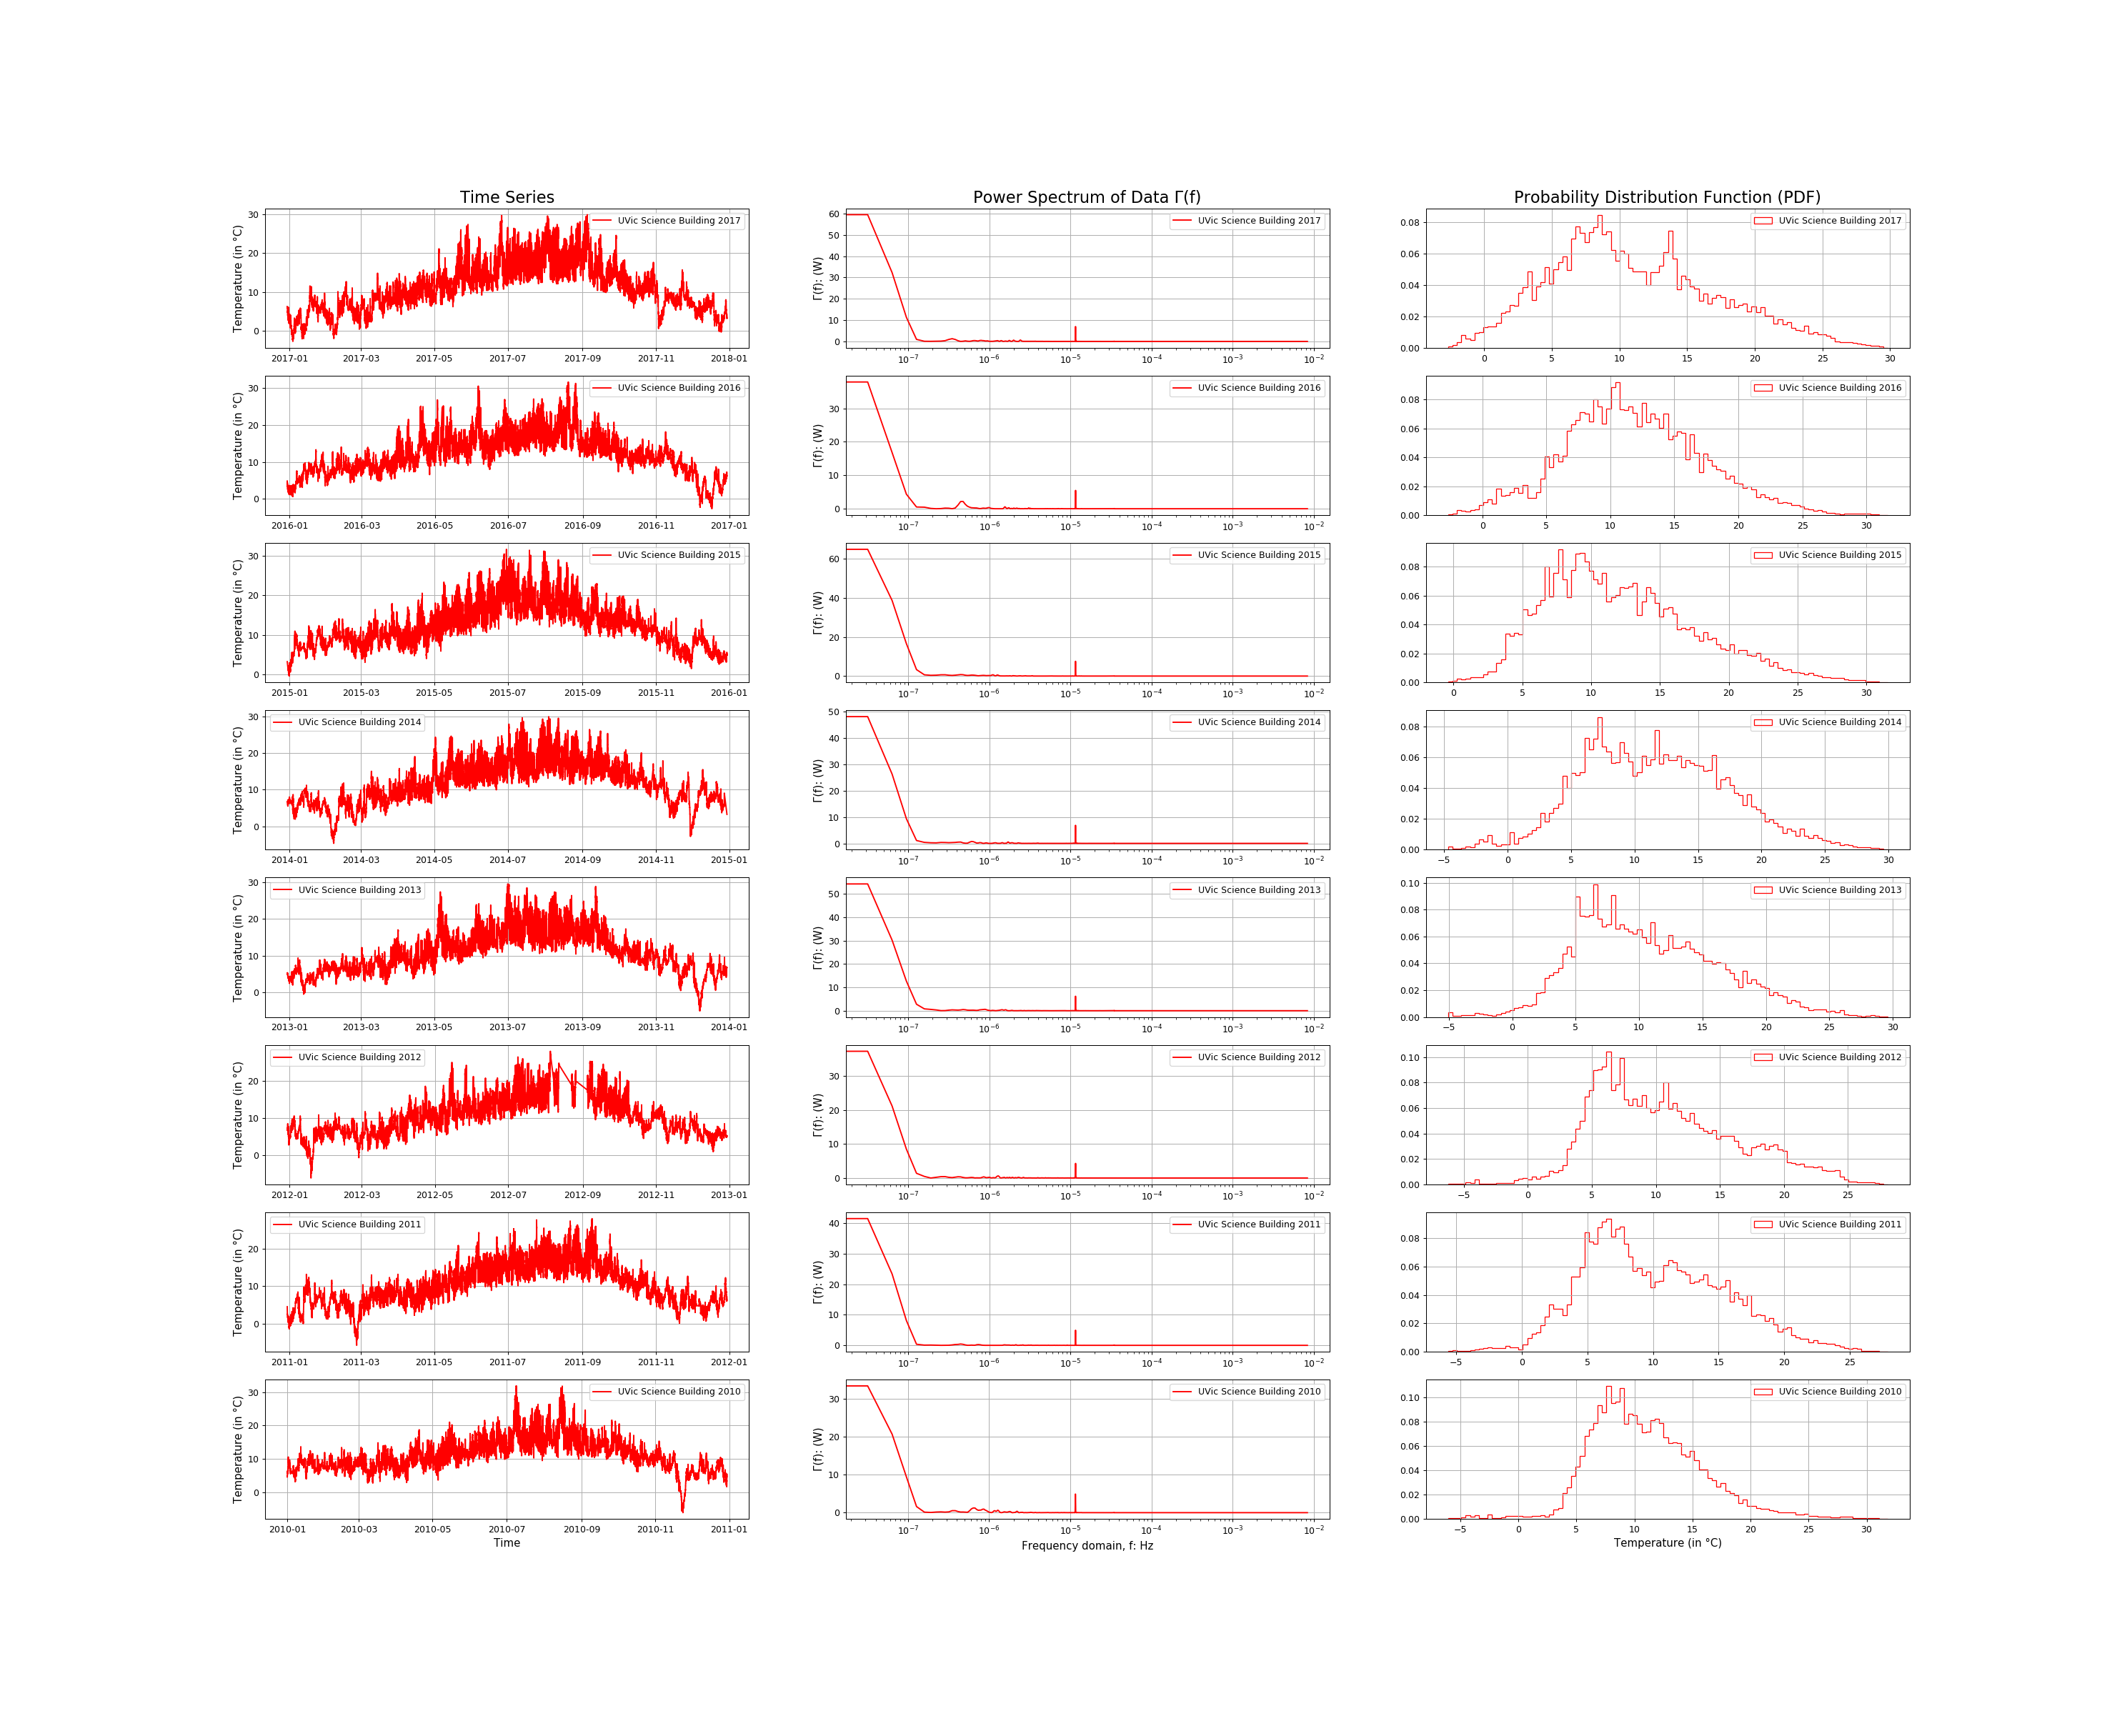

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: 
The 'normed' kwa

Text(0.5, 1.0, 'Probability Distribution Function (PDF)')

In [22]:
plt.close()

plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)

fig = plt.figure(figsize=(33, 27))

ax1 = plt.subplot2grid((8,3), (0,0))
ax2 = plt.subplot2grid((8,3), (0,1))
ax3 = plt.subplot2grid((8,3), (1,0))
ax4 = plt.subplot2grid((8,3), (1,1))
ax5 = plt.subplot2grid((8,3), (2,0))
ax6 = plt.subplot2grid((8,3), (2,1))
ax7 = plt.subplot2grid((8,3), (3,0))
ax8 = plt.subplot2grid((8,3), (3,1))
ax9 = plt.subplot2grid((8,3), (4,0))
ax10 = plt.subplot2grid((8,3), (4,1))
ax11 = plt.subplot2grid((8,3), (5,0))
ax12 = plt.subplot2grid((8,3), (5,1))
ax13 = plt.subplot2grid((8,3), (6,0))
ax14 = plt.subplot2grid((8,3), (6,1))
ax15 = plt.subplot2grid((8,3), (7,0))
ax16 = plt.subplot2grid((8,3), (7,1))
ax17 = plt.subplot2grid((8,3), (0,2))
ax18 = plt.subplot2grid((8,3), (1,2))
ax19 = plt.subplot2grid((8,3), (2,2))
ax20 = plt.subplot2grid((8,3), (3,2))
ax21 = plt.subplot2grid((8,3), (4,2))
ax22 = plt.subplot2grid((8,3), (5,2))
ax23 = plt.subplot2grid((8,3), (6,2))
ax24 = plt.subplot2grid((8,3), (7,2))

ax1.plot(yr2017_pretty, temp_us_17, 'r-', label="UVic Science Building 2017")
ax3.plot(yr2016_pretty, temp_us_16, 'r-', label="UVic Science Building 2016")
ax5.plot(yr2015_pretty, temp_us_15, 'r-', label="UVic Science Building 2015")
ax7.plot(yr2014_pretty, temp_us_14, 'r-', label="UVic Science Building 2014")
ax9.plot(yr2013_pretty, temp_us_13, 'r-', label="UVic Science Building 2013")
ax11.plot(yr2012_pretty, temp_us_12, 'r-', label="UVic Science Building 2012")
ax13.plot(yr2011_pretty, temp_us_11, 'r-', label="UVic Science Building 2011")
ax15.plot(yr2010_pretty, temp_us_10, 'r-', label="UVic Science Building 2010")
ax2.semilogx(f_us_17, PSD_us_17, 'r-', label="UVic Science Building 2017")
ax4.semilogx(f_us_16, PSD_us_16, 'r-', label="UVic Science Building 2016")
ax6.semilogx(f_us_15, PSD_us_15, 'r-', label="UVic Science Building 2015")
ax8.semilogx(f_us_14, PSD_us_14, 'r-', label="UVic Science Building 2014")
ax10.semilogx(f_us_13, PSD_us_13, 'r-', label="UVic Science Building 2013")
ax12.semilogx(f_us_12, PSD_us_12, 'r-', label="UVic Science Building 2012")
ax14.semilogx(f_us_11, PSD_us_11, 'r-', label="UVic Science Building 2011")
ax16.semilogx(f_us_10, PSD_us_10, 'r-', label="UVic Science Building 2010")
ax17.hist(temp_us_17, histtype='step', color='red', normed=True, label="UVic Science Building 2017", bins=100)
ax18.hist(temp_us_16, histtype='step', color='red', normed=True, label="UVic Science Building 2016", bins=100)
ax19.hist(temp_us_15, histtype='step', color='red', normed=True, label="UVic Science Building 2015", bins=100)
ax20.hist(temp_us_14, histtype='step', color='red', normed=True, label="UVic Science Building 2014", bins=100)
ax21.hist(temp_us_13, histtype='step', color='red', normed=True, label="UVic Science Building 2013", bins=100)
ax22.hist(temp_us_12, histtype='step', color='red', normed=True, label="UVic Science Building 2012", bins=100)
ax23.hist(temp_us_11, histtype='step', color='red', normed=True, label="UVic Science Building 2011", bins=100)
ax24.hist(temp_us_10, histtype='step', color='red', normed=True, label="UVic Science Building 2010", bins=100)

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax5.grid(True)
ax6.grid(True)
ax7.grid(True)
ax8.grid(True)
ax9.grid(True)
ax10.grid(True)
ax11.grid(True)
ax12.grid(True)
ax13.grid(True)
ax14.grid(True)
ax15.grid(True)
ax16.grid(True)
ax17.grid(True)
ax18.grid(True)
ax19.grid(True)
ax20.grid(True)
ax21.grid(True)
ax22.grid(True)
ax23.grid(True)
ax24.grid(True)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
ax7.legend()
ax8.legend()
ax9.legend()
ax10.legend()
ax11.legend()
ax12.legend()
ax13.legend()
ax14.legend()
ax15.legend()
ax16.legend()
ax17.legend()
ax18.legend()
ax19.legend()
ax20.legend()
ax21.legend()
ax22.legend()
ax23.legend()
ax24.legend()

ax15.set_xlabel("Time")
ax16.set_xlabel("Frequency domain, f: Hz")
ax24.set_xlabel("Temperature (in \u00B0C)")

ax1.set_ylabel("Temperature (in \u00B0C)")
ax2.set_ylabel("\u0393(f): (W)")
ax3.set_ylabel("Temperature (in \u00B0C)")
ax4.set_ylabel("\u0393(f): (W)")
ax5.set_ylabel("Temperature (in \u00B0C)")
ax6.set_ylabel("\u0393(f): (W)")
ax7.set_ylabel("Temperature (in \u00B0C)")
ax8.set_ylabel("\u0393(f): (W)")
ax9.set_ylabel("Temperature (in \u00B0C)")
ax10.set_ylabel("\u0393(f): (W)")
ax11.set_ylabel("Temperature (in \u00B0C)")
ax12.set_ylabel("\u0393(f): (W)")
ax13.set_ylabel("Temperature (in \u00B0C)")
ax14.set_ylabel("\u0393(f): (W)")
ax15.set_ylabel("Temperature (in \u00B0C)")
ax16.set_ylabel("\u0393(f): (W)")

ax1.set_title("Time Series")
ax2.set_title("Power Spectrum of Data \u0393(f)")
ax17.set_title("Probability Distribution Function (PDF)")

In [24]:
#plt.savefig("/home/jupyter/Phys-411-final-project/Images/UVicSciAnnualData.eps")
plt.close()

In [30]:
mode17 = statistics.mode(temp_us_17)
mode16 = statistics.mode(temp_us_16)
mode15 = statistics.mode(temp_us_15)
mode14 = statistics.mode(temp_us_14)
mode13 = statistics.mode(temp_us_13)
mode12 = statistics.mode(temp_us_12)
mode11 = statistics.mode(temp_us_11)
mode10 = statistics.mode(temp_us_10)

In [ ]:
lowest_us_temp = [min(temp_us_10), min(temp_us_11), min(temp_us_12), min(temp_us_13), min(temp_us_14), min(temp_us_15), min(temp_us_16), min(temp_us_17)]
highest_us_temp = [max(temp_us_10), max(temp_us_11), max(temp_us_12), max(temp_us_13), max(temp_us_14), max(temp_us_15), max(temp_us_16), max(temp_us_17)]
mean_us_temp = [sum(temp_us_10)/len(temp_us_10), sum(temp_us_11)/len(temp_us_11), sum(temp_us_12)/len(temp_us_12), sum(temp_us_13)/len(temp_us_13), sum(temp_us_14)/len(temp_us_14), sum(temp_us_15)/len(temp_us_15), sum(temp_us_16)/len(temp_us_16), sum(temp_us_17)/len(temp_us_17)]

In [31]:
mode_us_temp = [mode10, mode11, mode12, mode13, mode14, mode15, mode16, mode17]

In [16]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

<IPython.core.display.Javascript object>


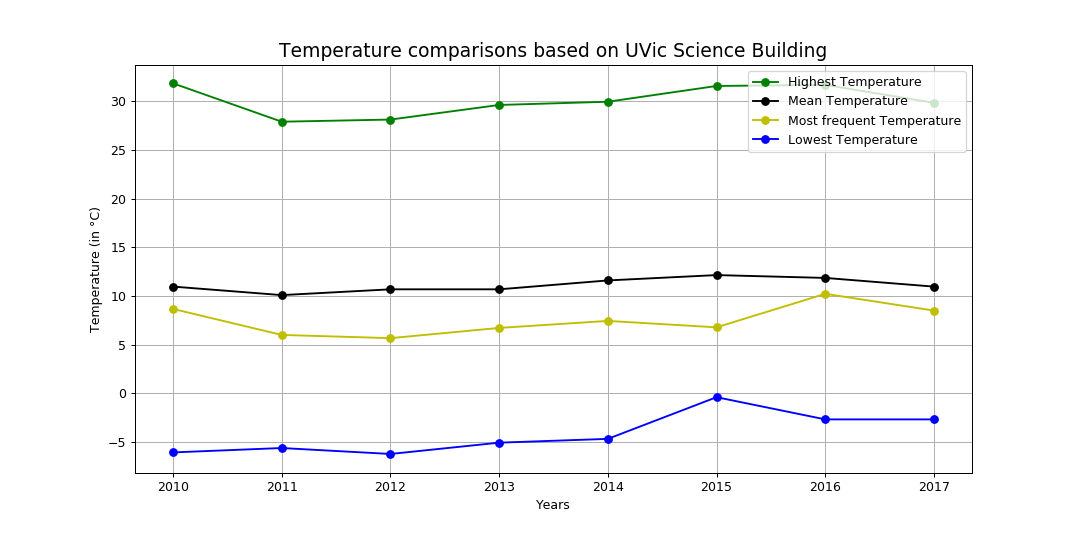

Text(0.5, 1.0, 'Temperature comparisons based on UVic Science Building')

In [32]:
plt.figure(figsize=(12, 6))

plt.rc('axes', labelsize=10)
plt.rc('axes', titlesize=15)

plt.plot(years, highest_us_temp, 'go-', label='Highest Temperature')
plt.plot(years, mean_us_temp, 'ko-', label='Mean Temperature')
plt.plot(years, mode_us_temp, 'yo-', label='Most frequent Temperature')
plt.plot(years, lowest_us_temp, 'bo-', label='Lowest Temperature')
plt.grid(True)
plt.legend()
plt.ylabel("Temperature (in \u00B0C)")
plt.xlabel("Years")
plt.title("Temperature comparisons based on UVic Science Building")

In [33]:
plt.savefig("/home/jupyter/Phys-411-final-project/Images/TempComparison.eps")
plt.close()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [20]:
corr_time_stamps = np.linspace(datenum_10_1_1+2, datenum_17_1_1 + 365, 7*24*365 + 1)
N = len(corr_time_stamps)

In [22]:
temp_us = uvic_sci_fn(corr_time_stamps)

In [41]:
temp_us_hr = uvic_sci_hr_fn(corr_time_stamps - 0.3125)  #UTC = PST + 8 hours = PDT + 7 hours. So taking average of 7.5 days
us_hr_utc_mean = sum(temp_us_hr)/len(temp_us_hr)

In [26]:
temp_jb = james_bay_fn(corr_time_stamps)

In [38]:
temp_jm = john_muir_fn(corr_time_stamps)

In [20]:
temp_dc = deep_cove_fn(corr_time_stamps)

In [46]:
temp_kt = keating_fn(corr_time_stamps)

In [54]:
temp_hg = helgesen_fn(corr_time_stamps)

In [26]:
temp_de = discovery_elementary_fn(corr_time_stamps)

In [20]:
loc_us = np.array([110*np.cos(np.pi*48.462/180)*(236.691 - 360), 110*48.462])

In [21]:
loc_jb = np.array([110*np.cos(np.pi*48.417/180)*(236.62 - 360), 110*48.417])

In [22]:
loc_jm = np.array([110*np.cos(np.pi*48.371/180)*(236.25 - 360), 110*48.371])

In [23]:
loc_dc = np.array([110*np.cos(np.pi*48.68/180)*(236.543 - 360), 110*48.68])

In [24]:
loc_kt = np.array([110*np.cos(np.pi*48.568/180)*(236.597 - 360), 110*48.568])

In [25]:
loc_hg = np.array([110*np.cos(np.pi*48.364/180)*(236.446 - 360), 110*48.364])

In [26]:
loc_de = np.array([110*np.cos(np.pi*48.652/180)*(236.349 - 360), 110*48.652])

In [42]:
add0 = sum((temp_us - us_mean)*(temp_us_hr - us_hr_utc_mean))
#print(add0)
correlation_self = add0/(N - 1)/np.sqrt(us_var*us_hr_var)

In [43]:
correlation_self

0.9862623294696874

In [27]:
add1 = sum((temp_us - us_mean)*(temp_jb - jb_mean))
#print(add1)
correlation_jb = add1/(N - 1)/np.sqrt(us_var*jb_var)

In [28]:
correlation_jb

0.9320265527966303

In [39]:
add2 = sum((temp_us - us_mean)*(temp_jm - jm_mean))
#print(add2)
correlation_jm = add2/(N - 1)/np.sqrt(us_var*jm_var)

In [40]:
correlation_jm

0.8962797504294047

In [21]:
add3 = sum((temp_us - us_mean)*(temp_dc - dc_mean))
#print(add3)
correlation_dc = add3/(N - 1)/np.sqrt(us_var*dc_var)

In [22]:
correlation_dc

0.9568481304237885

In [47]:
add4 = sum((temp_us - us_mean)*(temp_kt - kt_mean))
#print(add4)
correlation_kt = add4/(N - 1)/np.sqrt(us_var*kt_var)

In [48]:
correlation_kt

0.9752346056030579

In [56]:
add5 = sum((temp_us - us_mean)*(temp_hg - hg_mean))
#print(add5)
correlation_hg = add5/(N - 1)/np.sqrt(us_var*hg_var)

In [57]:
correlation_hg

0.9712726414473524

In [45]:
add6 = sum((temp_us - us_mean)*(temp_de - de_mean))
#print(add6)
correlation_de = add6/(N - 1)/np.sqrt(us_var*de_var)

In [46]:
correlation_de

0.9586418082442786

In [28]:
def distance(array1, array2): 
    return np.sqrt((array1[0] - array2[0])**2 + (array1[1] - array2[1])**2), array2

In [29]:
minnamelist = ["UVic Science Bldg.\n(48.462\u00B0N, 236.691\u00B0E)", "James Bay\n(48.417\u00B0N, 236.62\u00B0E)", "John Muir\n(48.371\u00B0N, 236.25\u00B0E)", "Deep Cove\n(48.68\u00B0N, 236.543\u00B0E)", "Keating\n(48.568\u00B0N, 236.597\u00B0E)", "Helgesen Elementary\n(48.364\u00B0N, 236.446\u00B0E)", "Discovery Elementary\n(48.652\u00B0N, 236.349\u00B0E)"]

In [30]:
correlations = [0.9862623294696874, 0.9320265527966303, 0.8962797504294047, 0.9568481304237885, 0.9752346056030579, 0.9712726414473524, 0.9586418082442786]
distances = [distance(loc_us, loc_us), distance(loc_us, loc_jb), distance(loc_us, loc_jm), distance(loc_us, loc_dc), distance(loc_us, loc_kt), distance(loc_us, loc_hg), distance(loc_us, loc_de)]
colours = ['red', 'navy', 'yellow', 'fuchsia', 'cyan', 'purple', 'orange']

<IPython.core.display.Javascript object>


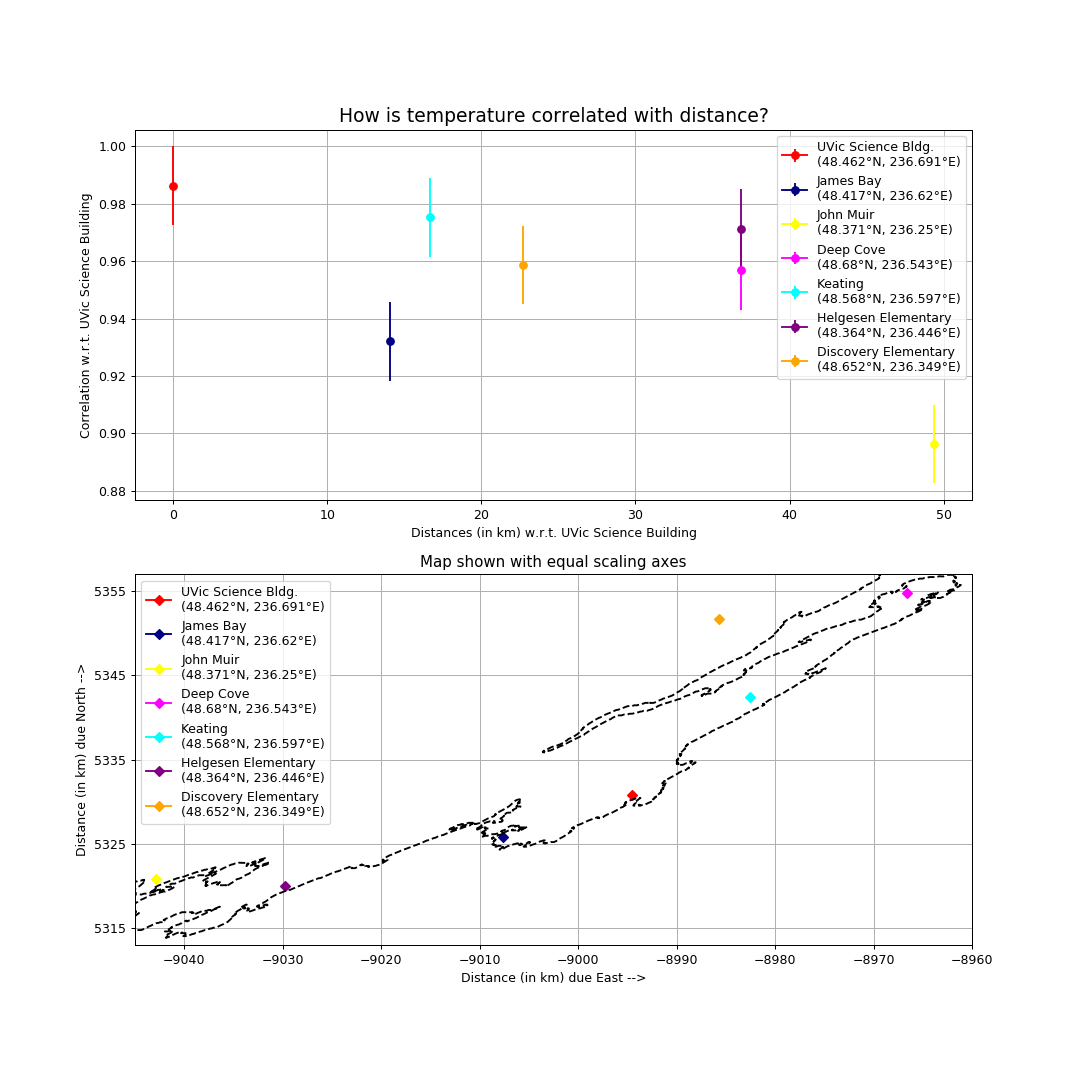

In [31]:
fig = plt.figure(figsize=(12, 12))

plt.rc('axes', labelsize=10)
plt.rc('axes', titlesize=15)

ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0))

for i in range(len(colours)):
    ax1.errorbar(distances[i][0], correlations[i], color=colours[i], marker='o', yerr=(1-0.9862623294696874), label=minnamelist[i])
    ax2.plot(distances[i][1][0], distances[i][1][1], color=colours[i], marker='D', label=minnamelist[i])

ax1.plot(0, 1, 'k-')
ax2.plot(coast_loc_x, coast_loc_y, 'k--')
ax1.legend()
ax1.grid(True)
ax1.set_xlabel("Distances (in km) w.r.t. UVic Science Building")
ax1.set_ylabel("Correlation w.r.t. UVic Science Building")
ax1.set_title("How is temperature correlated with distance?")
ax2.grid(True)
ax2.legend()
ax2.set_xlim(-9045, -8960)
ax2.set_ylim(5313, 5357)
plt.rc('axes', titlesize=12)
ax2.set_title("Map shown with equal scaling axes")
ax2.set_xlabel("Distance (in km) due East -->")
ax2.set_ylabel("Distance (in km) due North -->")
ax2.set_yticks([5315, 5325, 5335, 5345, 5355])

In [32]:
plt.savefig("/home/jupyter/Phys-411-final-project/Images/Correlations.eps")
plt.close()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [35]:
0%2

0